# 01 - BIOINFORMATICS - De Novo Assembly Method To Obtain The gene sequence.

## Project Description

Data is in _fasta_ format. Every two lines represents a read (a DNA fragment) with 60bp. The first line started with ‘>’ contains the name of the read and the second line is the nucleotide sequence. 

Tips: 
- Repeated sequences larger than 25bp do not occur in original sequence. 
- Each read overlaps at least 25bp with other reads.


## Project objective
These reads (DNA fragments) of repeated sequences overlap. The task is to construct a de novo method to assemble these reads and obtain the gene sequence.

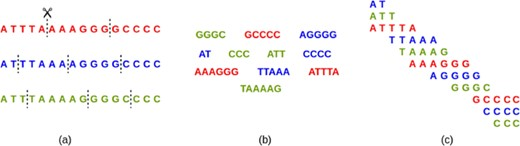

* bp = A base pair (bp) is a fundamental unit of double-stranded nucleic acids consisting of two nucleobases bound to each other by hydrogen bonds. They form the building blocks of the DNA double helix and contribute to the folded structure of both DNA and RNA.

## Project Methodology
De novo genome assembly relies on two kinds of graphs: de Bruijn graphs and overlap graphs. Overlap graphs are the basis for the Celera assembler, while de Bruijn graphs have become the dominant technical device in the last decade. Those two kinds of graphs are collectively called assembly graphs.

https://link.springer.com/content/pdf/10.1007/s40484-019-0181-x.pdf

### Notes

De novo sequencing refers to sequencing a novel genome where there is no reference sequence available for alignment. Sequence reads are assembled as contigs, and the coverage quality of de novo sequence data depends on the size and continuity of the contigs (ie, the number of gaps in the data).

In [16]:
import networkx as nx
from collections import Counter

import matplotlib.pyplot as plt

import debruijn as db

# 1 Read and preprocess the dataset

## 1.1 Read the data

In [18]:
def readGenome(file):
    genome = ''
    with open(file, 'r') as f:
        for line in f:
            """ If the 1st character of the line is not an error, then we add the line to genome string
            """
            if not line[0] == '>':
                genome += line.rstrip()

    return genome

In [19]:
genome = readGenome('20Xreads.fasta')
print(genome[:100])

GGATTGCTTTCAGCACTCGCAGCCGTGGACCGCCGTGCGGTCCTTTCCTCCGCAGTGAGCGAAGAATCAATCTGTGTGAGTCTGTTTTTCAAAATGAAAT


Let's check the length of the genome to make sure all the dataset is loaded.

In [20]:
len(genome)

316919

## 1.2 Data analysis

### 1.2.1 Frequancy analysis of each base

In [22]:
counts = {'A' : 0,
          'C': 0,
          'G' : 0,
          'T': 0}

In [23]:
for base in genome:
    counts[base] += 1
print(counts)

{'A': 87414, 'C': 65567, 'G': 68836, 'T': 95102}


Let's do sequences analysis through ***collections*** Pythn module.

In [27]:
collections.Counter(genome)

Counter({'G': 68836, 'A': 87414, 'T': 95102, 'C': 65567})

### ***Conclusion:*** The 'T' genes are the most frequent, while the gene 'C' is the least frequent.

# 2 Construct Graphs for DNA Sequencing

## 2.1 Overlap Graph

## 2.2 De Bruijn Graph

The length is often denoted by k, and sequences k-mers. The value of k is important for constructing de Bruijn graph. A large value of k will remove some short repetitive regions while reducing the number of nodes in de Bruijn graph, but will give rise to more unconnected sub-graphs which means that the number of gap regions increases. A small value of k will reduce some gap regions while increases the connectivity of de Bruijn graph, but will add more nodes and increase short repetitive regions. **. Therefore, the value of k cannot be too large or too small.**

In [28]:
# Construct de bruijn graph from sets of short reads with k length word
bruijn_graph = db.construct_graph(genome, 3)

In [29]:
type(bruijn_graph)

tuple

In [30]:
# Perform searching for Eulerian path in the graph to output genome assembly
path = db.output_contigs(bruijn_graph)

IndexError: list index out of range

In [162]:
path

'ACGTGGATTGCTTTCAGCACTCGCAGCCGTGCGGTCCTTTCCTCCGCCGTCTGTGAGCCAATCAAAATCTGTGTTTTTCAACACACTATTCTCTGGCCTGCTTCTCACTGCTTTATGAGTGAAGAATGCAGTCATTTATAAATAACATGGCAATCAAAACATATATGTGTTCCAATAATCATTAAGGCAAACCGCAATCTGCAGAGTGTGTTACATGGGCTTGACCAACCCTGTGAAACATGCCCACCTTGGGACCTCCCACCATGTTTTGTGAAAGTTACAGGATTAGGATCCAGGATGACTAACAGCAGCCTACTGAAACATACAAGTAGACCCGGGTTAGAGGCTCTGAGAAACGGCACATTAGAGCGCCTCACAGCGAAGCTTTTTTATTCTTTATCAATGAGACATTAGAATGGGAAAACTATGTCCAAGGATGGTAGTACTTGGATCTCGTATCGAGTTCGACAGCATCTCCCCAGAGGGGTCCTTCTGAATTTTGAGTCACCTCCCAAACGGTCTTCTGTTTCCTTGATCCATTTTTACTTTCCCTGCGCAACCATGACTTTTTTGTTGTTTCAGACGCTCCTTTTCTCAAGGAAATAAGAAGCTGCGAGACATCCACATTATGCAGGCTATACCTAGTATGGCCTGAGTCCAAAAATAGATTTAATACAGGCGGTCGTTGCAGCAAAGGGTGTCAAATCTTGGTATTTTAAGCTCCATAGCTCATAGGAGAAAGCGTCATTCCTCTCATCACAACCTGTCCACCAAGTTATCAGGCTCCTTGCCTGCCCTAGGAGCACTTTAGGGTGAAATTTTTACAAGGATTTTCCCTCCCTCCCTTGTGAAATCAACATCTAAGTTCACACAAACAGCCAAAGATGTGACTACGTCCCCCTCTTCTCATGAAACCCCCGCGCTCTGTTAAGCTGACTGGGTGTAGTCACAGAGAAGTACTATACAGCAGAATACATAGCCATGTAGGTTGCCTAACAA

In [163]:
# Print the information in the graph to be (somewhat) presentable
# db.print_graph(bruijn_graph)

In [167]:
class GraphVisualization:

    def __init__(self):
        self.visual = []
        self.G = nx.DiGraph()

    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)

    def visualize(self):
#         options = {
#             'node_color': 'blue',
#             'node_size': 50,
#             'width': 1,
#             'arrowstyle': '-|>',
#             'arrowsize': 10,
#         }
#         self.G.add_edges_from(self.visual)
#         pos = nx.spring_layout(self.G, seed=15000)
#         nx.draw(self.G, pos, with_labels=False, **options)
#         plt.show()

        options = {
            'node_color': 'blue',
            'node_size': 50,
            'width': 1,
            'arrowstyle': '-|>',
            "linewidths": 1
        }
        G = nx.Graph()
        G.add_edges_from(self.visual)
        pos = nx.circular_layout(G)
        nx.draw_networkx(G, pos, with_labels=False, **options)
        plt.show()

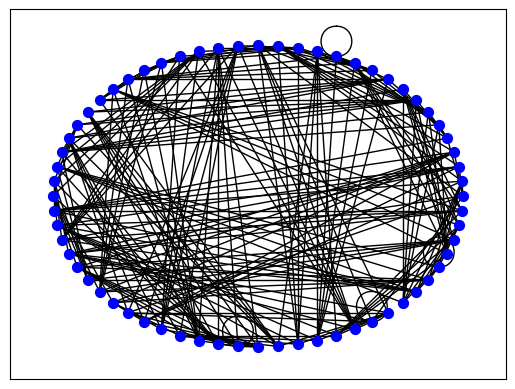

In [168]:
graph_plot = GraphVisualization()

vertexes = bruijn_graph[0] # take the nodes
edges = bruijn_graph[1]

for vertex in vertexes.keys():
    edges1 = edges[vertex]
    for edge in edges1:
        graph_plot.addEdge(vertex, edge.label)
graph_plot.visualize()

In [169]:
class percentage_error:
    @classmethod
    def calculate(cls, original_string, reconstructed_string):
        '''
            Compare index wise mismatch
        '''
        length = min(len(reconstructed_string), len(original_string))
        count = 0
        print("length " + str(length))
        for i in range(length):
            if original_string[i] != reconstructed_string[i]:
                count = count + 1

        return float(count) / float(length)

In [170]:
print(percentage_error.calculate(reads, path))

length 5282
1.0
